# **Mushroom FP-Growth-**

Group Members:
1.Mohammad Nurul Abrar (2018-1-60-139)
2.MD Maruf (2018-1-60-140)


In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pip install pyfpgrowth

     |████████████████████████████████| 1.6 MB 5.4 MB/s 
  Created wheel for pyfpgrowth: filename=pyfpgrowth-1.0-py2.py3-none-any.whl size=5504 sha256=0140e9758744e47e0c242e6e4cc29ede0ed4cddc92ae113a8aded1e463768a77
  Stored in directory: /root/.cache/pip/wheels/73/97/4b/f12ac994f6bbb99597396255435824c73ad3916be1e678be55
Successfully built pyfpgrowth


In [ ]:
%pip install numpy

In [ ]:
%pip install mlxtend --upgrade

     |████████████████████████████████| 1.3 MB 5.3 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
import pandas as pd
import numpy as np
import pyfpgrowth
import os

In [ ]:
import pandas as pd
import numpy as np
mushroomdata= pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/477project/mushroom.csv", header = None) 
mushroomdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,3,9,13,23,25,34,36,38,40,52,54,59,63,67,76,85,86,90,93,98,107,113
1,2,3,9,14,23,26,34,36,39,40,52,55,59,63,67,76,85,86,90,93,99,108,114
2,2,4,9,15,23,27,34,36,39,41,52,55,59,63,67,76,85,86,90,93,99,108,115
3,1,3,10,15,23,25,34,36,38,41,52,54,59,63,67,76,85,86,90,93,98,107,113
4,2,3,9,16,24,28,34,37,39,40,53,54,59,63,67,76,85,86,90,94,99,109,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,52,58,59,63,73,83,85,88,90,93,106,112,119
8120,2,3,9,13,24,28,35,36,39,50,52,58,59,63,73,83,85,87,90,93,106,110,119
8121,2,6,9,13,24,28,35,36,39,41,52,58,59,63,73,83,85,88,90,93,106,112,119
8122,1,7,10,13,24,31,34,36,38,48,53,58,59,66,67,76,85,86,90,94,102,110,119


In [ ]:
mushroomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       8124 non-null   int64
 1   1       8124 non-null   int64
 2   2       8124 non-null   int64
 3   3       8124 non-null   int64
 4   4       8124 non-null   int64
 5   5       8124 non-null   int64
 6   6       8124 non-null   int64
 7   7       8124 non-null   int64
 8   8       8124 non-null   int64
 9   9       8124 non-null   int64
 10  10      8124 non-null   int64
 11  11      8124 non-null   int64
 12  12      8124 non-null   int64
 13  13      8124 non-null   int64
 14  14      8124 non-null   int64
 15  15      8124 non-null   int64
 16  16      8124 non-null   int64
 17  17      8124 non-null   int64
 18  18      8124 non-null   int64
 19  19      8124 non-null   int64
 20  20      8124 non-null   int64
 21  21      8124 non-null   int64
 22  22      8124 non-null   int64
dtypes: int64(23)


In [ ]:
mushroomdata.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [ ]:
#Data frame to list of list convertion 
transactions= []
for sublist in mushroomdata.values.tolist():
    clean_sublist=[item for item in sublist if item is not np.nan]
    transactions.append(clean_sublist)
print(transactions)
for iteration, item in enumerate(transactions):
  iteration
print(iteration)

[[1, 3, 9, 13, 23, 25, 34, 36, 38, 40, 52, 54, 59, 63, 67, 76, 85, 86, 90, 93, 98, 107, 113], [2, 3, 9, 14, 23, 26, 34, 36, 39, 40, 52, 55, 59, 63, 67, 76, 85, 86, 90, 93, 99, 108, 114], [2, 4, 9, 15, 23, 27, 34, 36, 39, 41, 52, 55, 59, 63, 67, 76, 85, 86, 90, 93, 99, 108, 115], [1, 3, 10, 15, 23, 25, 34, 36, 38, 41, 52, 54, 59, 63, 67, 76, 85, 86, 90, 93, 98, 107, 113], [2, 3, 9, 16, 24, 28, 34, 37, 39, 40, 53, 54, 59, 63, 67, 76, 85, 86, 90, 94, 99, 109, 114], [2, 3, 10, 14, 23, 26, 34, 36, 39, 41, 52, 55, 59, 63, 67, 76, 85, 86, 90, 93, 98, 108, 114], [2, 4, 9, 15, 23, 26, 34, 36, 39, 42, 52, 55, 59, 63, 67, 76, 85, 86, 90, 93, 98, 108, 115], [2, 4, 10, 15, 23, 27, 34, 36, 39, 41, 52, 55, 59, 63, 67, 76, 85, 86, 90, 93, 99, 107, 115], [1, 3, 10, 15, 23, 25, 34, 36, 38, 43, 52, 54, 59, 63, 67, 76, 85, 86, 90, 93, 98, 110, 114], [2, 4, 9, 14, 23, 26, 34, 36, 39, 42, 52, 55, 59, 63, 67, 76, 85, 86, 90, 93, 98, 107, 115], [2, 3, 10, 14, 23, 27, 34, 36, 39, 42, 52, 55, 59, 63, 67, 76, 85

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
mushroomtr = TransactionEncoder()
mushroomte_ary = mushroomtr.fit(transactions).transform(transactions)
mushroomds = pd.DataFrame(mushroomte_ary, columns=mushroomtr.columns_)
mushroomds 

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119
0,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,...,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,True,...,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False
2,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False
3,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
4,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,True,...,False,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,...,False,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True
8120,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
8121,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,Fals

In [ ]:
# 0 equal false
mushroomds[0]=bool(False)
mushroomds

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,0
0,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,True,...,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
1,False,True,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,True,...,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
2,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,True,False,False,True,False,...,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False
3,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,...,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False
4,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,True,False,True,True,...,False,False,False,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,...,False,False,True,False,True,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False
8120,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,True,False,False,True,False,...,False,False,True,False,True,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True,False
8121,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False

In [ ]:
import time
from mlxtend.frequent_patterns import fpgrowth

mthreshold = 1
mushroom_time = []
mthreshold_value = []

for i in range(0,7):
  start = time.time()
  rules=fpgrowth(mushroomds, min_support=mthreshold, use_colnames=True)
  end = time.time()
  mushroom_time.append(end-start)
  mthreshold_value.append(mthreshold)
  mthreshold = mthreshold - 0.1
  print(rules)

   support itemsets
0      1.0     (85)
    support      itemsets
0  1.000000          (85)
1  0.975382          (86)
2  0.974151          (34)
3  0.921713          (90)
4  0.975382      (85, 86)
5  0.974151      (34, 85)
6  0.973166      (34, 86)
7  0.973166  (34, 85, 86)
8  0.921713      (90, 85)
     support          itemsets
0   1.000000              (85)
1   0.975382              (86)
2   0.974151              (34)
3   0.921713              (90)
4   0.838503              (36)
5   0.975382          (85, 86)
6   0.974151          (34, 85)
7   0.973166          (34, 86)
8   0.973166      (34, 85, 86)
9   0.921713          (90, 85)
10  0.898080          (90, 34)
11  0.897095          (90, 86)
12  0.898080      (90, 34, 85)
13  0.897095      (90, 85, 86)
14  0.897095      (90, 34, 86)
15  0.897095  (90, 34, 85, 86)
16  0.838503          (36, 85)
17  0.814870          (36, 86)
18  0.812654          (34, 36)
19  0.814870      (36, 85, 86)
20  0.812654      (34, 36, 85)
21  0.812654      

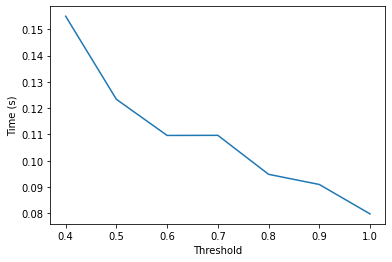

In [ ]:
from matplotlib import pyplot as plt

plt.plot( mthreshold_value,mushroom_time, label='Mushroom dataset')
plt.xlabel("Threshold")
plt.ylabel("Time (s)")
plt.savefig("mushfp.jpg")